In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
path_revision = 'Revision'

In [3]:
def get_table(base_path, report_name, entry):
    table = pd.read_csv(base_path + '/Sequential/' + report_name + '.txt')
    
    for i in range(1,5):
        index = pow(2,i)
        table[str(index)] = pd.read_csv(base_path + '/OpenMP/' + str(index) + '/' + report_name + '.txt')[entry]
    
    table['TBB'] = pd.read_csv(base_path + '/TBB/' + report_name + '.txt')[entry]
    return table.to_numpy()

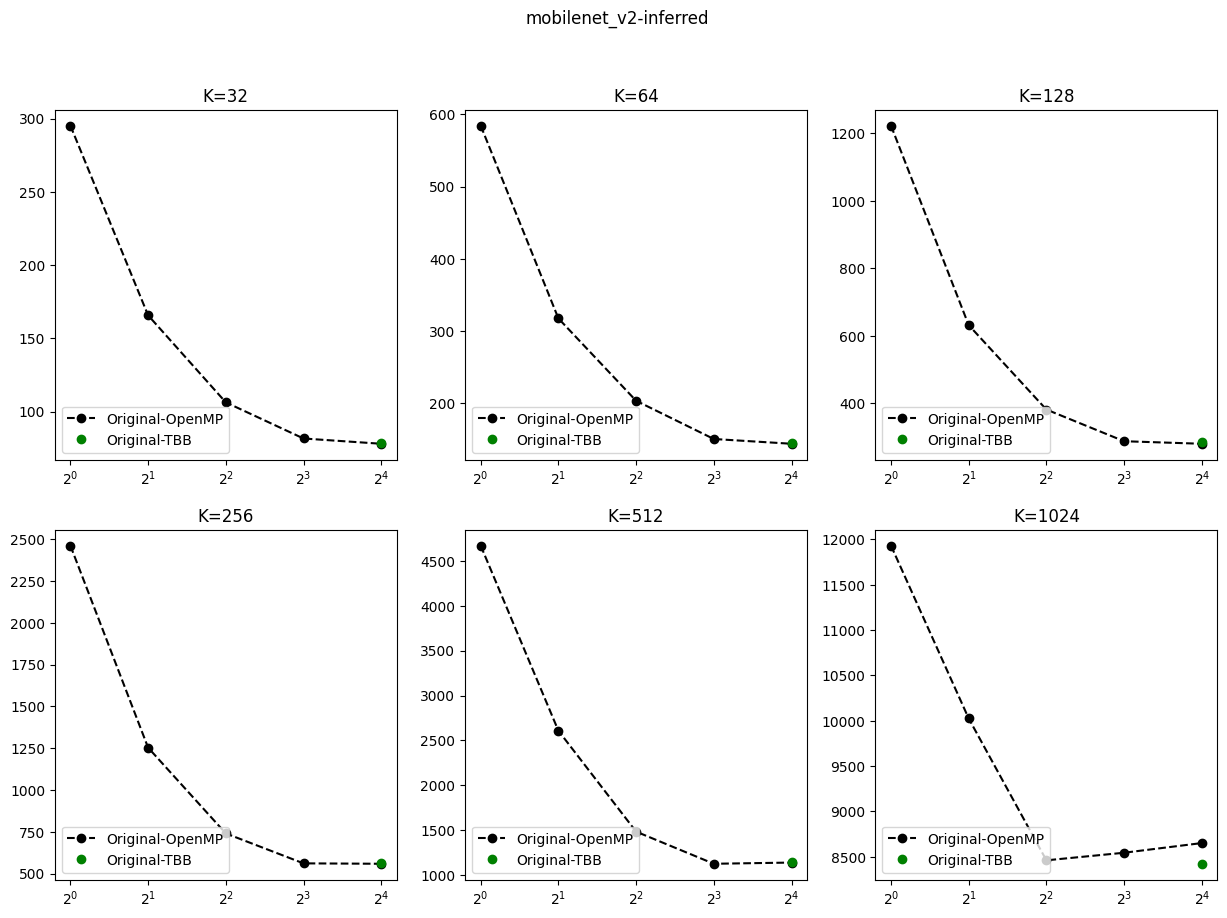

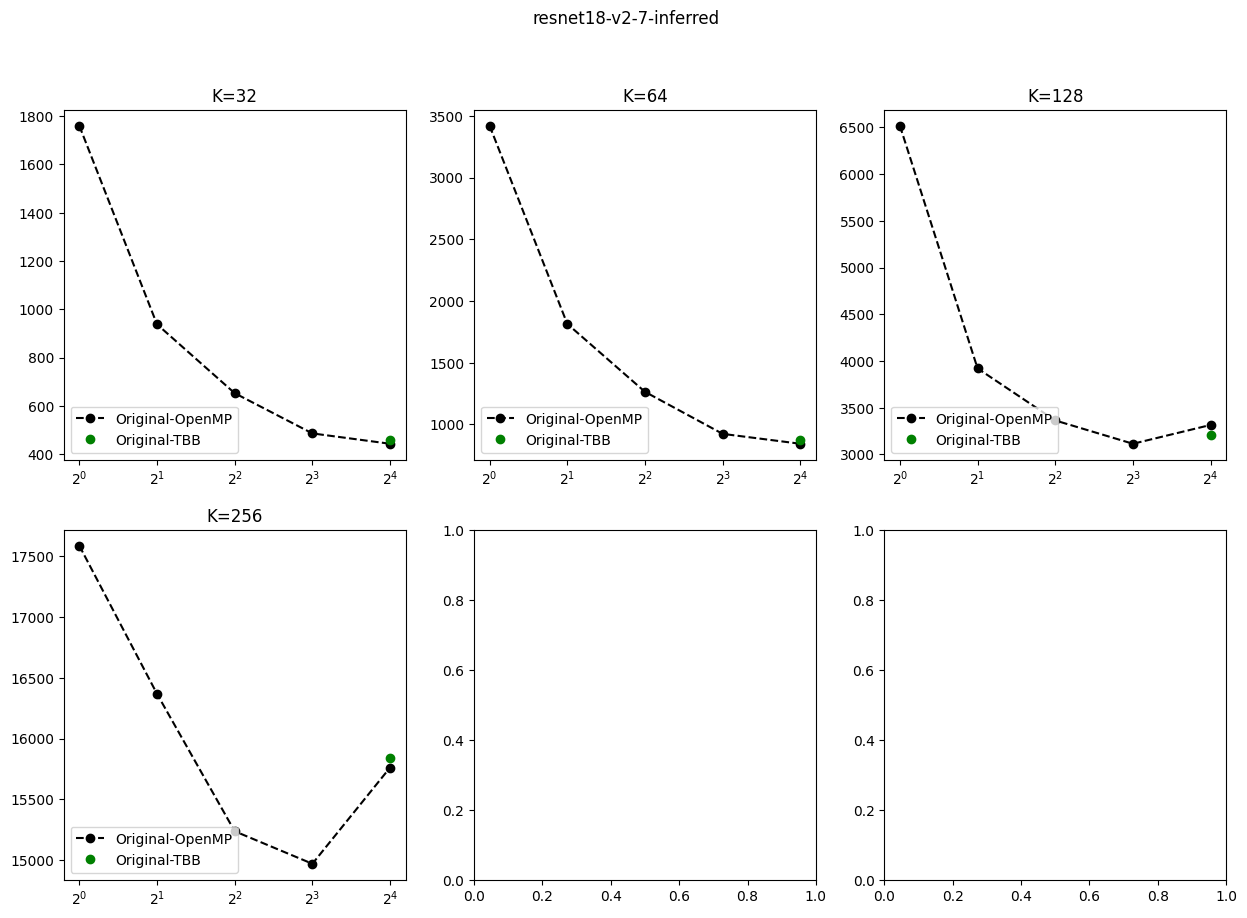

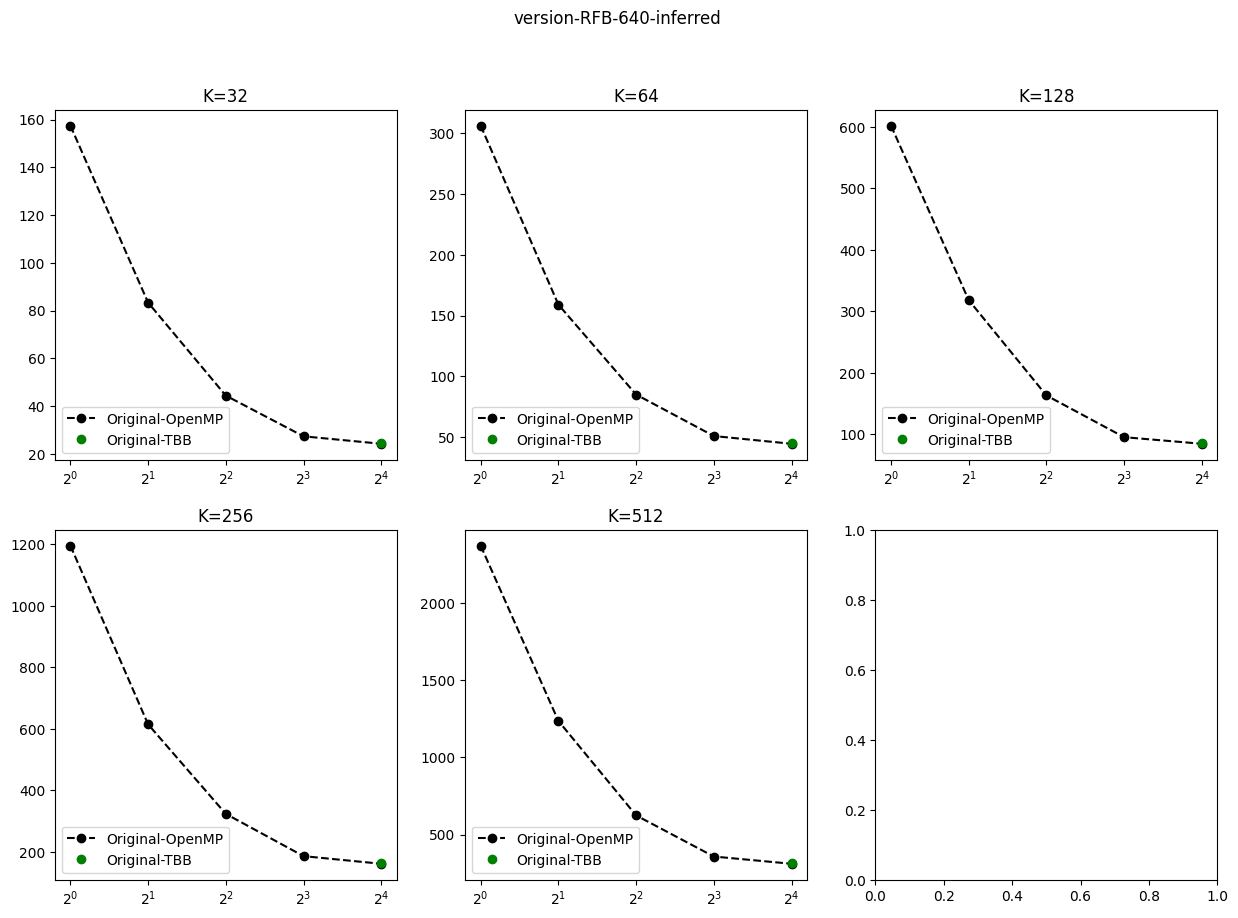

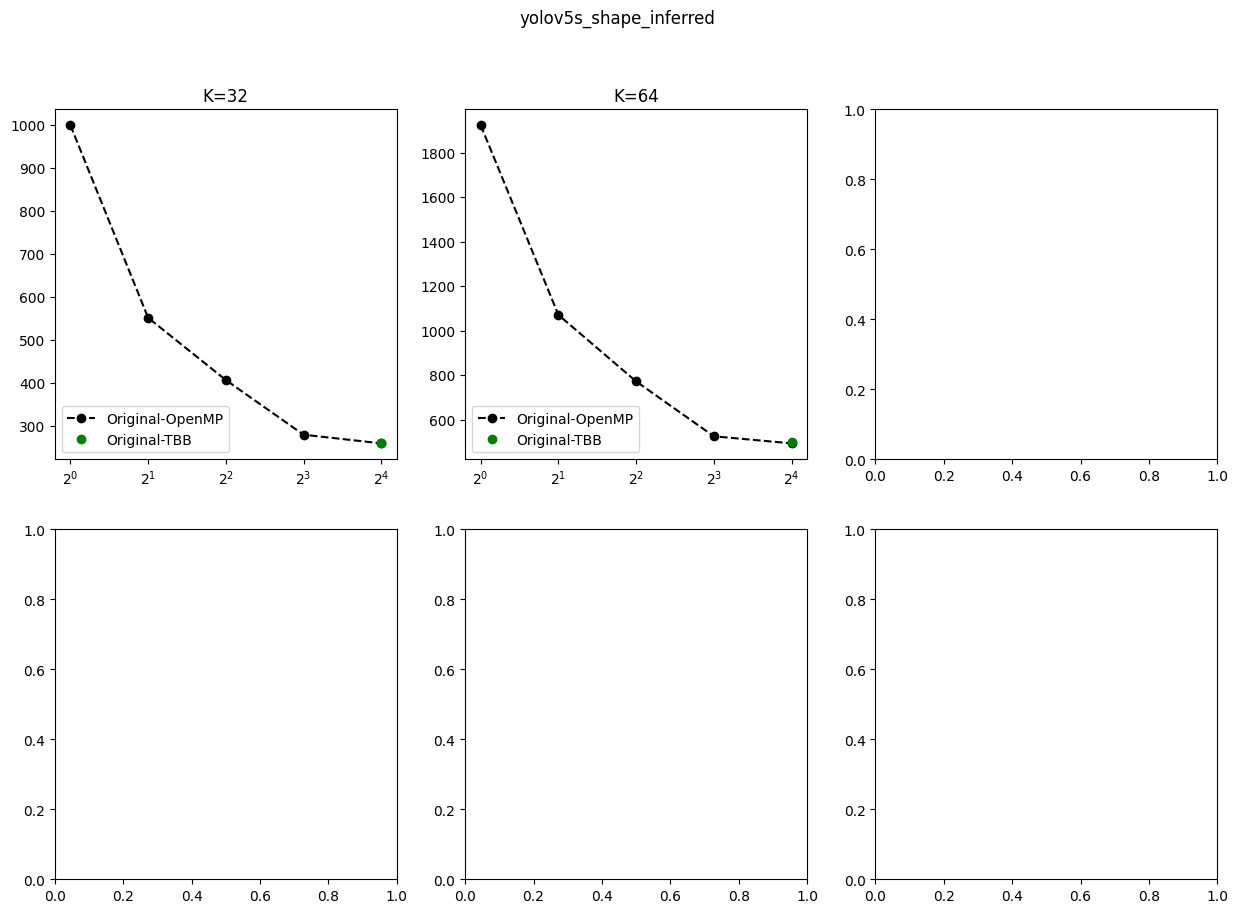

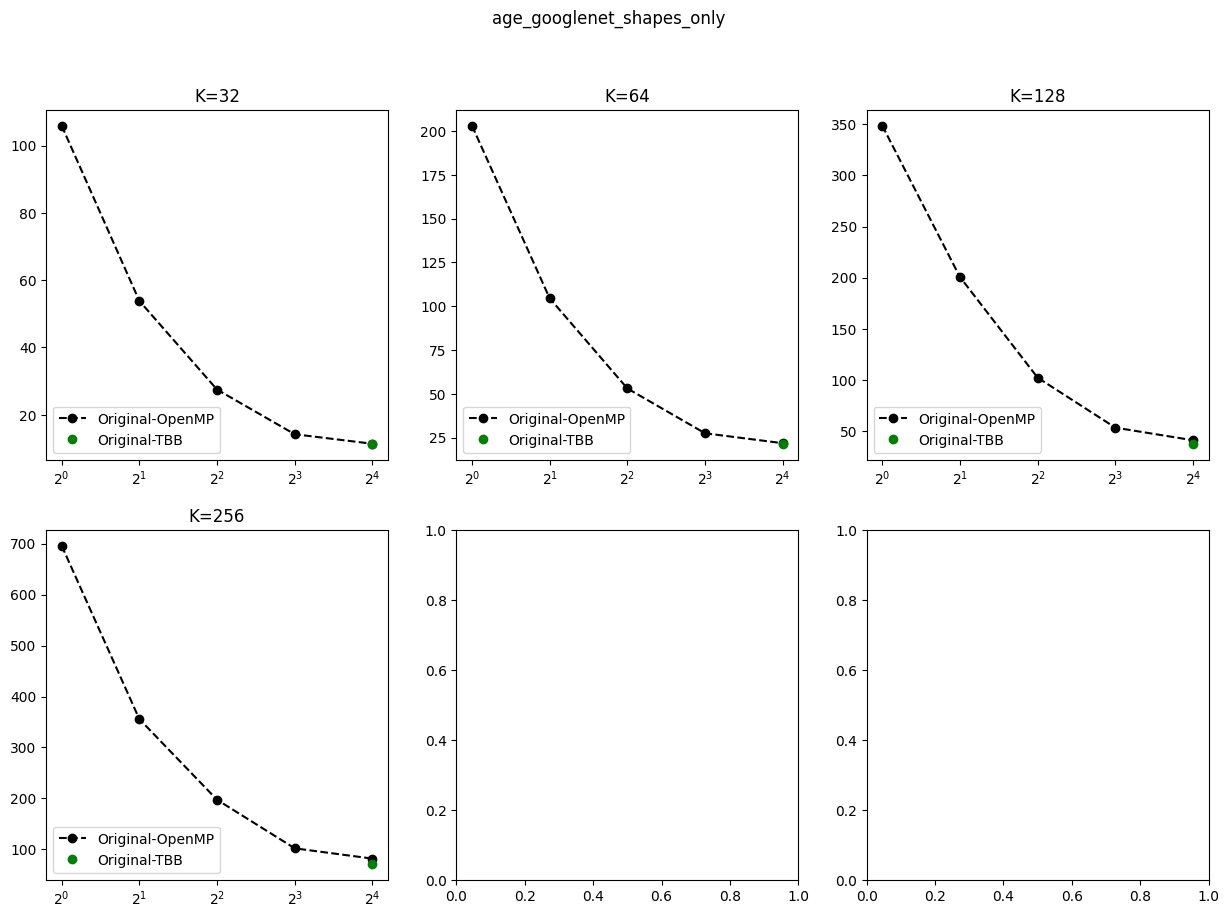

In [4]:
tot = [6, 4, 5, 2, 4]

res_revision = get_table(path_revision, 'report_IO_Manager', 'Export')

prev = 0
for i in range(len(tot)):
    fix, axs = plt.subplots(2, 3, figsize=(15, 10))

    fix.suptitle(res_revision[prev, 0])
    

    for j in range(tot[i]):
        y = j % 3
        x = math.floor(j / 3)

        axs[x,y].plot([1,2,4,8,16], res_revision[prev + j, 2:7], '--ko')
        axs[x,y].plot(16, res_revision[prev+j, 7], 'go')

        axs[x,y].set_title('K=' + str(res_revision[prev + j, 1]))

        axs[x,y].set_xscale('log', base=2)
        axs[x,y].legend(['Original-OpenMP', 'Original-TBB', 'Revision-OpenMP', 'Revision-Original-TBB'], loc='lower left')
    
    prev = tot[i] + prev